In [16]:
%jsroot off

* Сгенерируем два однородно распределенных числа: $u_1, u_2$ ~ $U(0, 1)$.
* Произведем преобразование: $v_1 = 2u_1 - 1; v_2 = 2u_2 - 1$
* Заполняем двумерную гистограмму, если $v_1^2 + v_2^2 < 1$
* Построим проекции двумерной гистограммы и посмотрим на рапределение.

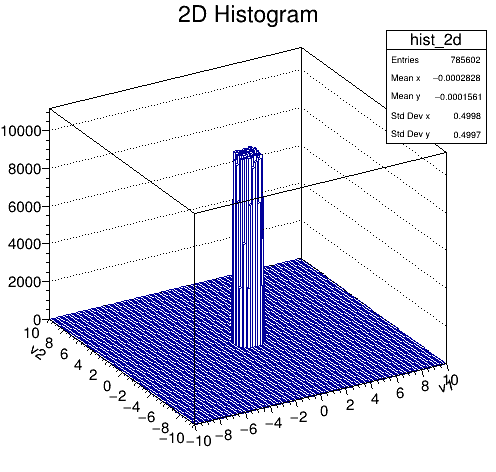

Warning in <TROOT::Append>: Replacing existing TH1: hist_2d (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas0


In [67]:
TRandom rnd;
int n = 1000000;
TH2F hist_2d("hist_2d","2D Histogram; v1; v2",
100,-10, 10, // X axis
100, -10, 10);

for (auto i = 0; i < n; i++)
{
    double u1 = rnd.Rndm();
    double u2 = rnd.Rndm();
    double v1 = 2*u1 - 1;
    double v2 = 2*u2 - 1;
    if ((pow(v1,2) + pow(v2,2)) < 1)
        hist_2d.Fill(v1, v2);
}
auto canvas0 = new TCanvas("canvas0","canvas0",500, 500);
hist_2d.Draw("lego");
canvas0->Draw();

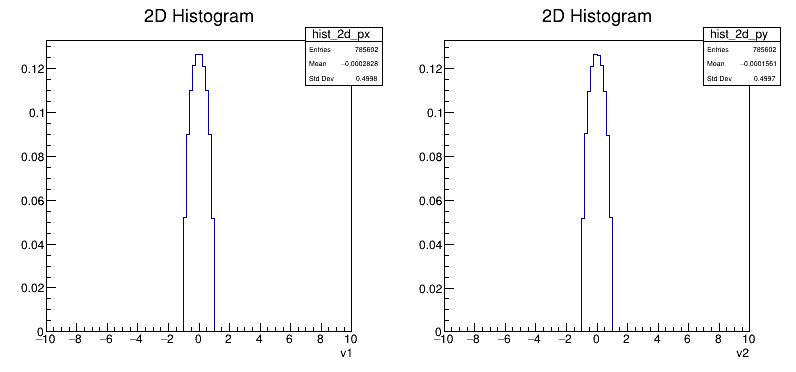

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [68]:
auto canvas = new TCanvas("canvas","canvas",800, 400);
canvas->Divide(2,1);
canvas->cd(1);
hist_2d.ProjectionX()->DrawNormalized();
canvas->cd(2);
hist_2d.ProjectionY()->DrawNormalized();
hist_2d.SetTitle("Projections on v1 and v2");
canvas->Draw();

Попробуем приблизить с помощью распределения Брейта-Вигнера(с тремя параметрами):

In [69]:
double fitfunc(double * vars, double * pars)
{
    return pars[2] * pow(pars[0]/4,2) / (pow(vars[0] - pars[1],2) + pow(pars[0]/2,2));
}

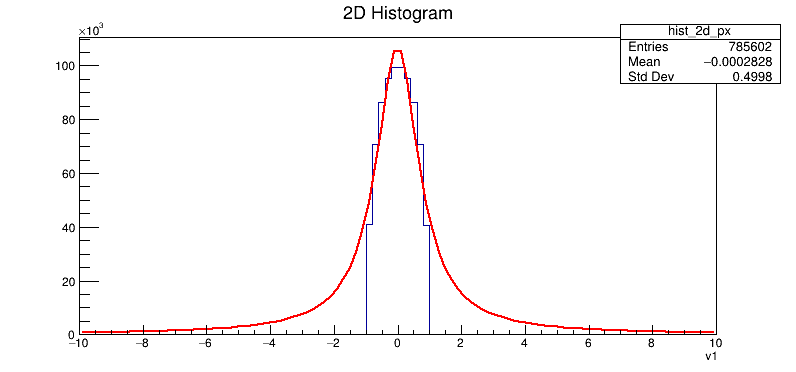

 FCN=7550.96 FROM MIGRAD    STATUS=CONVERGED     290 CALLS         291 TOTAL
                     EDM=3.49219e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.4 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.64938e+00   4.59863e-03   5.65568e-05   2.42725e-01
   2  p1          -6.51617e-04   1.29010e-03  -1.69502e-05  -5.35061e-01
   3  p2           4.27793e+05   7.15199e+02   1.15372e-01  -6.11731e-07

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      7550.96
NDf                       =            7
Edm                       =  3.49219e-07
NCalls                    =          291
p0                        =     -1.64938   +/-   0.00459863  
p1                        = -0.000651617   +/-   0.0012901   
p2                        =       427793   +/-   715.199     


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1


In [71]:
auto canvas1 = new TCanvas("canvas1","canvas1",800, 400);

TF1 ft("ft", fitfunc, 0, 10, 3);
ft.SetParameters(0, 1, 2);

auto fitResPtr = hist_2d.ProjectionX()->Fit(&ft, "S");
fitResPtr->Print();
canvas1->Draw();

или гауссовским распределением:

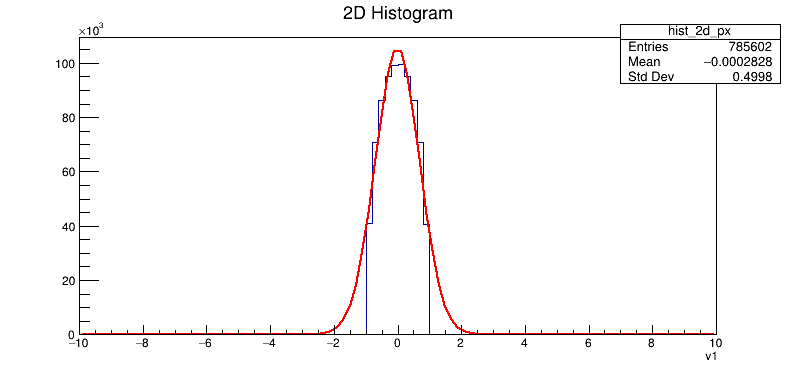

 FCN=3726.93 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=1.69072e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.05480e+05   1.61396e+02   3.55564e+00   7.04328e-07
   2  Mean        -6.09233e-04   1.08958e-03   3.24824e-05   5.03893e-01
   3  Sigma        6.94638e-01   1.37716e-03   1.75075e-05  -1.18864e-01

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      3726.93
NDf                       =            7
Edm                       =  1.69072e-07
NCalls                    =           72
Constant                  =       105480   +/-   161.396     
Mean                      = -0.000609233   +/-   0.00108958  
Sigma                     =     0.694638   +/-   0.00137716   	 (limited)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas2


In [72]:
auto canvas2 = new TCanvas("canvas2","canvas2",800, 400);

//TF1 ft("ft", fitfunc, 0, 10, 3);
//ft.SetParameters(0, 1, 2);

auto fitResPtr = hist_2d.ProjectionX()->Fit("gaus", "S");
fitResPtr->Print();
canvas1->Draw();

Скорее всего, это будет распределение Коши...